In [1]:
import numpy as np
from scipy.ndimage import laplace
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [146]:
nx,ny = 30,50 #0.6 x 1.0

u0 = np.zeros((nx,ny))
def dudt(u, t, pos, phi, kappa, gamma, dx):
    du = np.zeros((nx,ny))
    for p in pos:
        du[p[0], p[1]] += phi / dx**2
    u = u.reshape((nx,ny))
    delu = laplace(u, mode='nearest')
    du += kappa * delu / (dx * dx)
    du -= gamma * u
    return du.ravel()

phi = 1
kappa = 1e-9
dx = 1e-2 / ny # one cm divided by grid points
t = np.linspace(0, 24 * 60 * 60, 200)

In [147]:
dx

0.0002

In [148]:
import json
f = open('metadata_pad.txt')
s = f.readline()
metadata = json.loads(s)
pos_list = metadata['InitialPositionList']
all_pos = [p['DeviceCoordinatesUm']['TIXYDrive'] for p in pos_list]
all_pos = np.array(all_pos) * 1e-6

pos1 = all_pos[[0,1],:]
pos2 = all_pos[[2,3,4,5,6,7,8],:]
pos3 = all_pos[[9,10,11,12,13],:]
pos4 = all_pos[[14,15,16],:]
pos5 = all_pos[[17,18,19,20,21,22,23,24,25],:]
pos6 = all_pos[[26,27,28,29,30,31],:]
pos7 = all_pos[[32,33,34,35],:]

pos1 = pos1 - pos1.mean(axis=0)
pos1 = pos1 / dx
pos1[:,0] = pos1[:,0] + nx/2
pos1[:,1] = pos1[:,1] + ny/2
pos1 = pos1.astype(int) 

pos2 = pos2 - pos2.mean(axis=0) 
pos2 = pos2 / dx
pos2[:,0] = pos2[:,0] + nx/2
pos2[:,1] = pos2[:,1] + ny/2
pos2 = pos2.astype(int) 

pos3 = pos3 - pos3.mean(axis=0) 
pos3 = pos3 / dx
pos3[:,0] = pos3[:,0] + nx/2
pos3[:,1] = pos3[:,1] + ny/2
pos3 = pos3.astype(int) 

pos4 = pos4 - pos4.mean(axis=0) 
pos4 = pos4 / dx
pos4[:,0] = pos4[:,0] + nx/2
pos4[:,1] = pos4[:,1] + ny/2
pos4 = pos4.astype(int) 

pos5 = pos5 - pos5.mean(axis=0) 
pos5 = pos5 / dx
pos5[:,0] = pos5[:,0] + nx/2
pos5[:,1] = pos5[:,1] + ny/2
pos5 = pos5.astype(int) 

pos6 = pos6 - pos6.mean(axis=0) 
pos6 = pos6 / dx
pos6[:,0] = pos6[:,0] + nx/2
pos6[:,1] = pos6[:,1] + ny/2
pos6 = pos6.astype(int) 

pos7 = pos7 - pos7.mean(axis=0) 
pos7 = pos7 / dx
pos7[:,0] = pos7[:,0] + nx/2
pos7[:,1] = pos7[:,1] + ny/2
pos7 = pos7.astype(int) 

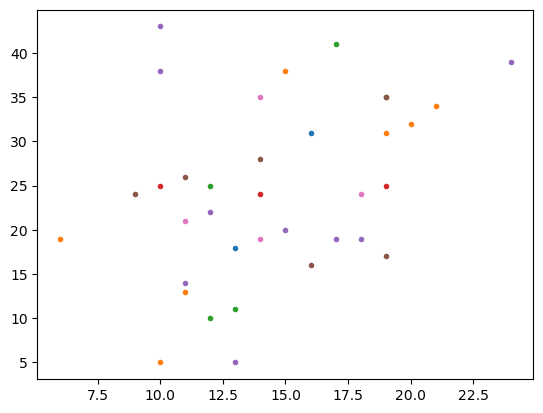

In [149]:
plt.plot(pos1[:,0], pos1[:,1], '.')
plt.plot(pos2[:,0], pos2[:,1], '.')
plt.plot(pos3[:,0], pos3[:,1], '.')
plt.plot(pos4[:,0], pos4[:,1], '.')
plt.plot(pos5[:,0], pos5[:,1], '.')
plt.plot(pos6[:,0], pos6[:,1], '.')
plt.plot(pos7[:,0], pos7[:,1], '.')

In [150]:
#t0_true1 = np.array([390, 371, 332, 259, 262, 252]) * 10 / 60
#t0_true2 = np.array([355, 323, 281]) * 10 / 60
#t0_true3 = np.array([374, 331]) * 10 / 60

t0_true = np.array([[182., 371.],
       [166., 324.],
       [165., 382.],
       [146., 340.],
       [161., 345.],
       [136., 268.],
       [128., 257.],
       [128., 259.],
       [155., 325.],
       [133., 312.],
       [133., 311.],
       [165., 356.],
       [154., 321.],
       [133., 294.],
       [55., 335.],
       [54., 292.],
       [51., 309.],
       [213., 397.],
       [188., 372.],
       [165., 326.],
       [125., 288.],
       [158., 309.],
       [158., 310.],
       [191., 405.],
       [188., 366.],
       [151., 338.],
       [164., 331.],
       [176., 338.],
       [169., 331.],
       [160., 286.],
       [170., 316.],
       [171., 348.],
       [181., 330.],
       [193., 353.],
       [198., 364.],
       [182., 339.]])
t0_true.shape

t0_true1 = t0_true[[0,1],1] * 10 / 60
t0_true2 = t0_true[[2,3,4,5,6,7,8],1] * 10 / 60
t0_true3 = t0_true[[9,10,11,12,13],1] * 10 / 60
t0_true4 = t0_true[[14,15,16],1] * 10 / 60
t0_true5 = t0_true[[17,18,19,20,21,22,23,24,25],1] * 10 / 60
t0_true6 = t0_true[[26,27,28,29,30,31],1] * 10 / 60
t0_true7 = t0_true[[32,33,34,35],1] * 10 / 60

#t0_true1 = t0_true[[0,1],1] * 10 / 60
#t0_true2 = t0_true[[2,4,6,7,8],1] * 10 / 60
#t0_true3 = t0_true[[11,12,13],1] * 10 / 60
#t0_true4 = t0_true[[14,15,16],1] * 10 / 60
#t0_true5 = t0_true[[17,18,19,21,24],1] * 10 / 60
#t0_true6 = t0_true[[29,30,31],1] * 10 / 60
#t0_true7 = t0_true[[32,34,35],1] * 10 / 60

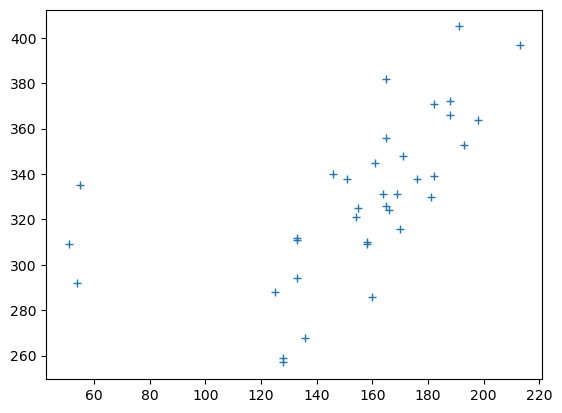

In [151]:
plt.plot(t0_true[:,0], t0_true[:,1], '+')

In [161]:
from scipy.interpolate import interp1d
from scipy.optimize import root_scalar

def solve_diffusion(pos, kappa, gamma, dx, dt, ts):
    nt = len(ts)
    print(nt)
    u = np.zeros((nt+1,nx,ny))
    u[0,:,:] = u0
    for ti in range(nt):
        t = int(ts[ti] * dt)
        du = dudt(u[ti,:,:], t, pos, phi, kappa, gamma, dx)
        u[ti+1,:,:] = u[ti,:,:] + dt * du.reshape(nx,ny)
    return u

def arrival_times(pos, phi, kappa, gamma, thresh, plot=False):
    #u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,gamma,dx))
    u = solve_diffusion(pos, kappa, gamma, dx, dt, ts)
    u = u.reshape((len(ts)+1,nx,ny))
    if plot:
        plt.imshow(u[-1,:,:],cmap='jet')
        plt.colorbar()
    umax = u.max()
    uthresh = u - thresh
    t0 = np.zeros((0,))
    for p in pos:
        zero_crossings = np.where(np.diff(np.sign(uthresh[:,p[0],p[1]]), axis=0))[0]
        if len(zero_crossings)>0:
            s = uthresh[:-1,p[0],p[1]]
            si = interp1d(ts, s)
            sol = root_scalar(si, bracket=(ts[0],ts[-1]))
            tt0 = sol.root
            t0 = np.append(t0, tt0)
        else:
            t0 = np.append(t0, np.nan)

    return t0 * dt / 3600

def u_err(pos, t0, phi, kappa, gamma, thresh, plot=False):
    #u = odeint(dudt, u0.ravel(), t, args=(pos,phi,kappa,gamma,dx))
    u = solve_diffusion(pos, kappa, gamma, dx, dt, ts)
    u = u.reshape((len(ts)+1,nx,ny))
    if plot:
        plt.imshow(u[-1,:,:])
        plt.colorbar()
    uthresh = u - thresh
    uerr = np.zeros_like(t0)
    for i in range(len(t0)):
        tt0 = t0[i] * 60 * 60 / dt
        ti = int(tt0)
        s = uthresh[:,pos[i,0],pos[i,1]]
        si = interp1d(ts, s, kind='cubic')
        tt0 = max(tt0, 0)
        uerr[i] = si(tt0)
    return uerr

In [153]:
phi = 1
#kappa = 1e-11
kappa = 1e-11
gamma = 0
#thresh = 1e11
thresh = 1e11
dt = 30
t = np.linspace(0, 72 * 60 * 60, 200)
ts = np.arange(0, 72 * 60 * 60 / dt)

8640
8640
8640
8640
8640
8640
8640


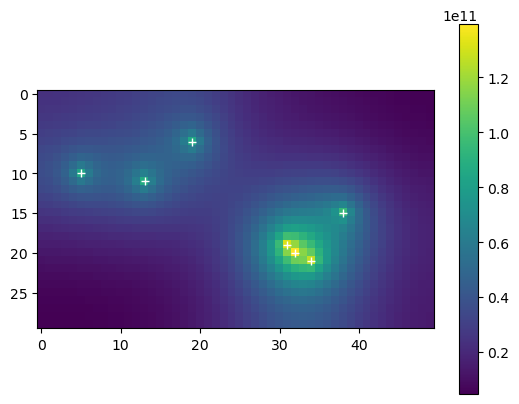

In [157]:
t01 = arrival_times(pos1, phi, kappa, gamma, thresh, plot=False)
t02 = arrival_times(pos2, phi, kappa, gamma, thresh, plot=True)
t03 = arrival_times(pos3, phi, kappa, gamma, thresh, plot=False)
t04 = arrival_times(pos4, phi, kappa, gamma, thresh, plot=False)
t05 = arrival_times(pos5, phi, kappa, gamma, thresh, plot=False)
t06 = arrival_times(pos6, phi, kappa, gamma, thresh, plot=False)
t07 = arrival_times(pos7, phi, kappa, gamma, thresh, plot=False)
plt.plot(pos2[:,1], pos2[:,0], 'w+')

[nan nan]
[        nan         nan         nan         nan         nan 27.94190968
 21.59704829 33.78798217         nan 63.55985638 62.9199553          nan
         nan         nan         nan         nan         nan         nan
 59.1678033  42.81753664 21.54799648 14.78722964 18.29846397         nan
         nan         nan 67.43486722 69.88144001 51.01137079 39.7101507
 52.18942842         nan         nan         nan         nan         nan]
[[ 1. nan]
 [nan nan]]


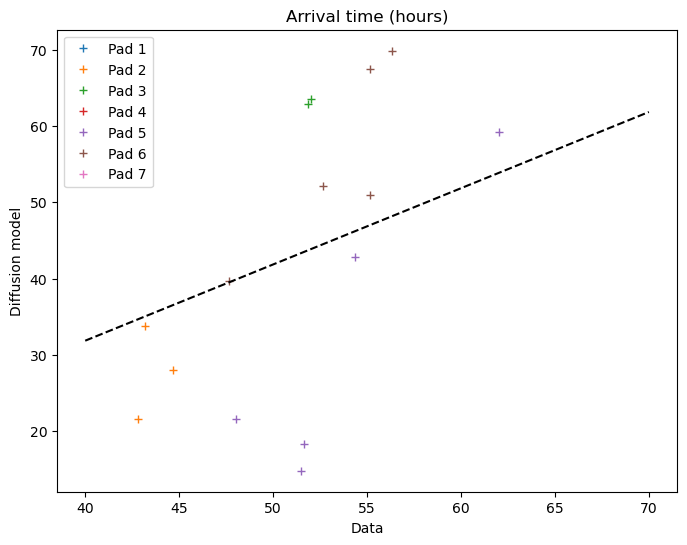

In [119]:
plt.figure(figsize=(8,6))

plt.plot(t0_true1, t01, '+')
plt.plot(t0_true2, t02, '+')
plt.plot(t0_true3, t03, '+')
plt.plot(t0_true4, t04, '+')
plt.plot(t0_true5, t05, '+')
plt.plot(t0_true6, t06, '+')
plt.plot(t0_true7, t07, '+')
x = np.concatenate([t0_true1,t0_true2,t0_true3,t0_true4,t0_true5,t0_true6,t0_true7])
y = np.concatenate([t01,t02,t03,t04,t05,t06,t07])
p = np.polyfit(x, y, deg=1)
print(p)
intercept = np.nanmean(y-x)
plt.plot([40,70], [intercept + 40, intercept + 70], 'k--')
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Data')
plt.ylabel('Diffusion model')
plt.title('Arrival time (hours)')
print(y)
plt.legend(['Pad 1', 'Pad 2', 'Pad 3', 'Pad 4', 'Pad 5', 'Pad 6', 'Pad 7',])

print(np.corrcoef(x,y))

In [120]:
def residuals(x):
    kappa,thresh = np.exp(x)
    t01 = arrival_times(pos1, phi, kappa, gamma, thresh, plot=False)
    t02 = arrival_times(pos2, phi, kappa, gamma, thresh, plot=False)
    t03 = arrival_times(pos3, phi, kappa, gamma, thresh, plot=False)
    t04 = arrival_times(pos4, phi, kappa, gamma, thresh, plot=False)
    t05 = arrival_times(pos5, phi, kappa, gamma, thresh, plot=False)
    t06 = arrival_times(pos6, phi, kappa, gamma, thresh, plot=False)
    t07 = arrival_times(pos7, phi, kappa, gamma, thresh, plot=False)
    
    xx = np.concatenate([t0_true1,t0_true2,t0_true3,t0_true4,t0_true5,t0_true6,t0_true7])
    yy = np.concatenate([t01,t02,t03,t04,t05,t06,t07])
    offset = np.nanmean(xx-yy)
    print(kappa,thresh, offset)

    resid2 = t02 - t0_true2 + offset
    resid1 = t01 - t0_true1 + offset
    resid3 = t03 - t0_true3 + offset
    resid4 = t04 - t0_true4 + offset
    resid5 = t05 - t0_true5 + offset
    resid6 = t06 - t0_true6 + offset
    resid7 = t07 - t0_true7 + offset

    #resid1 = u_err(pos1, t0_true1 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid2 = u_err(pos2, t0_true2 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid3 = u_err(pos3, t0_true3 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid4 = u_err(pos4, t0_true4 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid5 = u_err(pos5, t0_true5 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid6 = u_err(pos6, t0_true6 - offset, phi, kappa, gamma, thresh, plot=False)
    #resid7 = u_err(pos7, t0_true7 - offset, phi, kappa, gamma, thresh, plot=False)

    resid = np.concatenate([resid1,resid2,resid3,resid4,resid5,resid6,resid7])
    print(x)
    mse = np.mean(resid*resid)
    print(mse)
    #return mse
    return resid

In [110]:
from scipy.optimize import minimize, least_squares, fmin, basinhopping, brute, differential_evolution

lb = np.log([1e-12,1e10])
ub = np.log([1e-9,1e12])

bounds = [lb, ub]
res = least_squares(residuals, np.log([1e-11,1e10]) , bounds=bounds) #, verbose=2, diff_step=[1e-2,1e-3])
res
#res = basinhopping(residuals, np.log([1e-11,2400,40]))
#res = differential_evolution(residuals, bounds=np.log(((1e-12,1e-10),(1e2,1e6),(10,60))))
#xopt = fmin(residuals, np.log([1e-10,1e2]))

8640
8640
8640
8640
8640
8640
8640
9.999999999999985e-12 10000000023.025852 54.71405171911292
[-25.32843602  23.02585093]
33.7547020742567
8640
8640
8640
8640
8640
8640
8640
9.9999962257696e-12 10000000023.025852 54.71405173233388
[-25.3284364   23.02585093]
33.75470207731174
8640
8640
8640
8640
8640
8640
8640
9.999999999999985e-12 10000003454.145624 54.7140516593166
[-25.32843602  23.02585128]
33.75470207009118
8640


/tmp/ipykernel_50515/570593065.py:11: RuntimeWarning: invalid value encountered in multiply
  du -= gamma * u


8640
8640
8640
8640
8640
8640
8.79328247500187e-10 867621263908.7051 -17.139814814814812
[-20.85186286  27.48902112]
33.75891632373114
8640
8640
8640
8640
8640
8640
8640
2.550738326616566e-11 35717375505.33907 30.94489180911948
[-24.39205317  24.29890312]
nan
8640
8640
8640
8640
8640
8640
8640
1.249611985900593e-11 13857586271.904387 54.613418329854795
[-25.10560293  23.35209866]
33.73595963816578
8640
8640
8640
8640
8640
8640
8640
1.2496115184175415e-11 13857586271.904387 54.61341838291691
[-25.10560331  23.35209866]
33.735959662955864
8640
8640
8640
8640
8640
8640
8640
1.249611985900593e-11 13857591093.976456 54.613418197181005
[-25.10560293  23.35209901]
33.735959609664086
8640
8640
8640
8640
8640
8640
8640
2.0533543496084718e-11 24812079157.704937 51.11327133275781
[-24.6089613   23.93459643]
23.616341981322638
8640
8640
8640
8640
8640
8640
8640
2.053353596639258e-11 24812079157.704937 51.11327621237766
[-24.60896167  23.93459643]
23.616357825562453
8640
8640
8640
8640
8640
8640
86

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.637e+00  6.196e+00 ... -3.417e+00  3.585e+00]
           x: [-2.564e+01  2.496e+01]
        cost: 307.06453899837544
         jac: [[ 4.443e+01  4.977e+01]
               [ 4.443e+01  4.977e+01]
               ...
               [ 4.945e+00  7.343e+00]
               [ 4.115e+01  4.639e+01]]
        grad: [ 2.660e-02  2.388e-02]
  optimality: 0.05295496126071982
 active_mask: [0 0]
        nfev: 21
        njev: 18

In [142]:
res

     message: `ftol` termination condition is satisfied.
     success: True
      status: 2
         fun: [-1.637e+00  6.196e+00 ... -3.417e+00  3.585e+00]
           x: [-2.564e+01  2.496e+01]
        cost: 307.06453899837544
         jac: [[ 4.443e+01  4.977e+01]
               [ 4.443e+01  4.977e+01]
               ...
               [ 4.945e+00  7.343e+00]
               [ 4.115e+01  4.639e+01]]
        grad: [ 2.660e-02  2.388e-02]
  optimality: 0.05295496126071982
 active_mask: [0 0]
        nfev: 21
        njev: 18

7.318884030724033e-12 69121845007.61235
8640
8640
8640
8640
8640
8640
8640
7.318884030724033e-12 69121845007.61235 44.690149065937334
[-25.64056325  24.95913665]
17.059141055465304
rmse=4.1302713053097735
8640
8640
8640
8640
8640
8640
8640


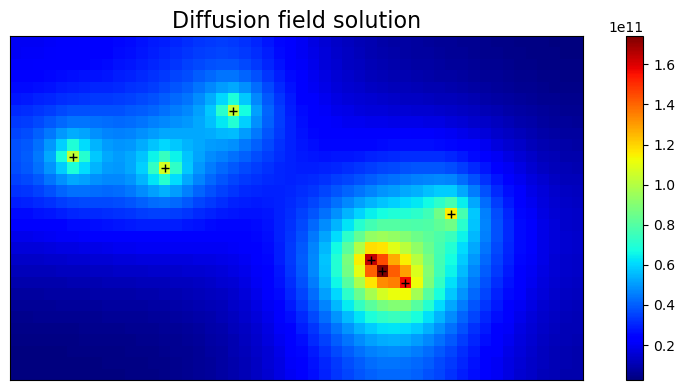

In [170]:
kappa0, thresh0 = np.exp(res.x)
print(kappa0, thresh0)

resid = residuals(np.log([kappa0,thresh0]))
rmse = np.sqrt(np.mean(resid*resid))
print(f'rmse={rmse}')

plt.figure(figsize=(9,4))
t01 = arrival_times(pos1, phi, kappa0, gamma, thresh0)
t02 = arrival_times(pos2, phi, kappa0, gamma, thresh0, plot=True)
t03 = arrival_times(pos3, phi, kappa0, gamma, thresh0)
t04 = arrival_times(pos4, phi, kappa0, gamma, thresh0)
t05 = arrival_times(pos5, phi, kappa0, gamma, thresh0)
t06 = arrival_times(pos6, phi, kappa0, gamma, thresh0)
t07 = arrival_times(pos7, phi, kappa0, gamma, thresh0)
plt.title('Diffusion field solution',fontsize=16)
plt.xticks([])
plt.yticks([])
plt.plot(pos2[:,1], pos2[:,0], 'k+')

plt.tight_layout()
plt.savefig('Pad_diffusion.png',dpi=300)
plt.show()

[  0.51512157 -18.23383392]


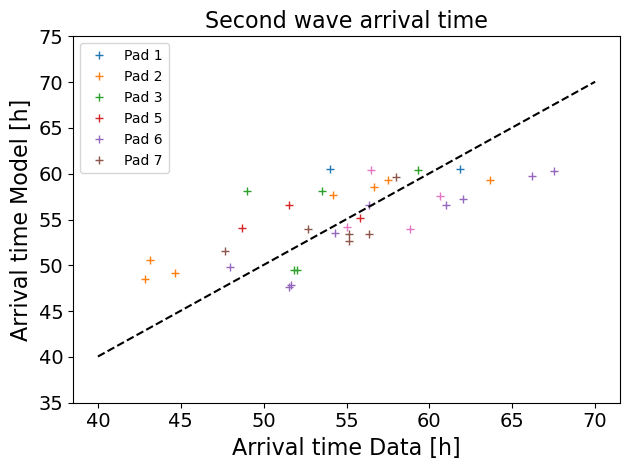

In [168]:
# Plot the data points
plt.plot(t0_true1, t01, '+')
plt.plot(t0_true2, t02, '+')
plt.plot(t0_true3, t03, '+')
plt.plot(t0_true4, t04, '+')
plt.plot(t0_true5, t05, '+')
plt.plot(t0_true6, t06, '+')
plt.plot(t0_true7, t07, '+')
plt.legend(['Pad 1', 'Pad 2', 'Pad 3', 'Pad 5', 'Pad 6', 'Pad 7'])

# Fit a line to the data
x = np.concatenate([t0_true1, t0_true2, t0_true3, t0_true5, t0_true6, t0_true7])
y = np.concatenate([t01, t02, t03, t05, t06, t07])
p = np.polyfit(x, y, deg=1)
print(p)
intercept = np.nanmean(y - x)
plt.plot([40, 70], [intercept + 40, intercept + 70], 'k--')

# Set the y-tick labels to be the same as the x-tick labels (without changing the values)
x_labels = plt.xticks()[1]  # Get the x-tick labels (strings)
plt.yticks(plt.yticks()[0], labels=x_labels, fontsize=14)  # Set y-tick labels to be the same as x-tick labels and fontsize 16
plt.xticks(fontsize=14)  # Set x-tick font size to 16

# Add labels, title, and limits if needed
plt.xlabel('Arrival time Data [h]', fontsize=16)
plt.ylabel('Arrival time Model [h]', fontsize=16)
plt.title('Second wave arrival time', fontsize=16)

#plt.ylim([0, 25])  # Optional: set y-limits
np.corrcoef(x, y)

plt.tight_layout()

plt.savefig('arrival_times.png',dpi=300)
plt.show()


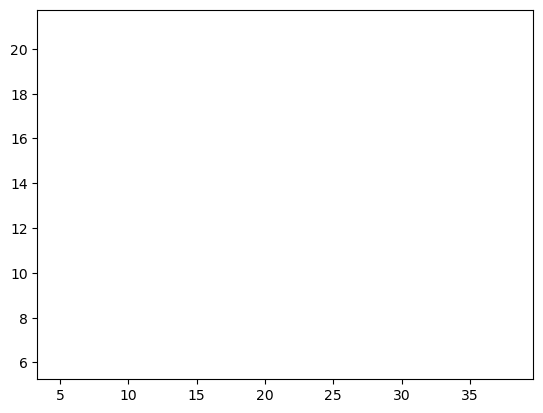

In [140]:
plt.plot(pos2[:,1], pos2[:,0], 'w+')

In [113]:
resid = residuals(np.log([1400,40]))

8640


/tmp/ipykernel_50515/570593065.py:10: RuntimeWarning: overflow encountered in multiply
  du += kappa * delu / (dx * dx)
/tmp/ipykernel_50515/570593065.py:10: RuntimeWarning: overflow encountered in divide
  du += kappa * delu / (dx * dx)
/tmp/ipykernel_50515/1994917524.py:12: RuntimeWarning: overflow encountered in multiply
  u[ti+1,:,:] = u[ti,:,:] + dt * du.reshape(nx,ny)
/tmp/ipykernel_50515/570593065.py:11: RuntimeWarning: invalid value encountered in multiply
  du -= gamma * u


8640
8640
8640
8640
8640
8640
1399.9999999999998 40.0 -17.139814814814812
[7.24422752 3.68887945]
33.75891632373114


In [114]:
kappas = [1e-13] # np.logspace(-13,-11,5)
threshs = np.linspace(1000,5000,5)
mses = []
for kappa in kappas:
    for thresh in threshs:
        x = kappa,thresh
        mse = residuals(np.log(x))
        mses.append(mse)

8640
8640
8640
8640
8640
8640
8640
9.999999999999999e-14 999.9999999999998 54.851851840740736
[-29.93360621   6.90775528]
33.75891632373114
8640
8640
8640
8640
8640
8640
8640
9.999999999999999e-14 1999.9999999999998 54.85185182962963
[-29.93360621   7.60090246]
33.75891632373114
8640
8640
8640
8640
8640
8640
8640
9.999999999999999e-14 2999.9999999999977 54.851851818518504
[-29.93360621   8.00636757]
33.75891632373115
8640
8640
8640
8640
8640
8640


KeyboardInterrupt: 

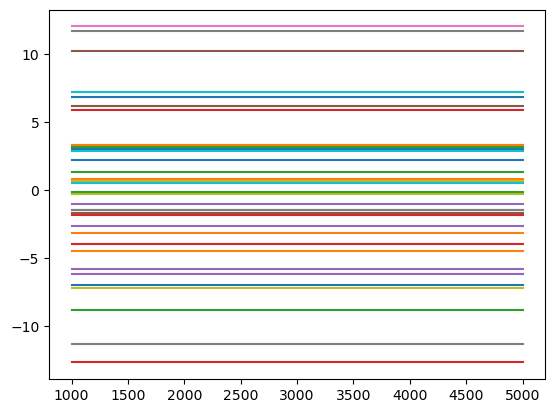

In [45]:
np.array(mses).shape
plt.plot(threshs, mses)

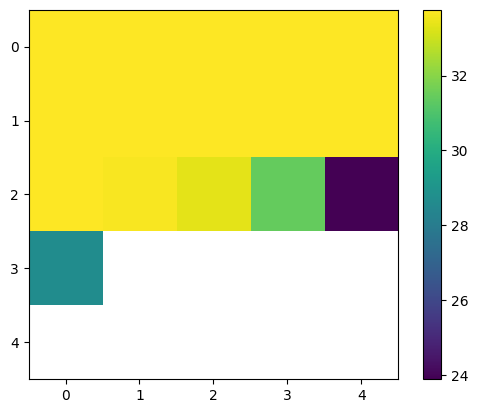

In [351]:
plt.imshow(np.real(np.array(mses).reshape((5,5))))
plt.colorbar()

In [265]:
kappa = 1e-11
threshs = np.linspace(1000,5000,20)
offset = 40
mses = []
for thresh in threshs:
    x = kappa,thresh,offset
    mse = residuals(np.log(x))
    mses.append(mse)

9.999999999999985e-12 999.9999999999998 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   6.90775528   3.68887945]
2262950.176959102
9.999999999999985e-12 1210.5263157894735 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.09881052   3.68887945]
1692679.4628249006
9.999999999999985e-12 1421.0526315789473 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.25915317   3.68887945]
1211051.4079704774
9.999999999999985e-12 1631.578947368421 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.3973035    3.68887945]
818066.0123958334
9.999999999999985e-12 1842.1052631578953 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.51866436   3.68887945]
513723.2761009668
9.999999999999985e-12 2052.631578947368 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.62687795   3.68887945]
298023.19908588036
9.999999999999985e-12 2263.157894736843 40.0
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.72451642   3.68887945]
170965.7813505705
9.999999999999985e-12

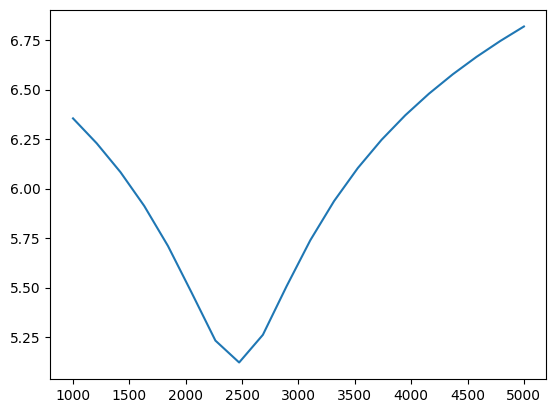

In [266]:
plt.plot(threshs, np.log10(mses))

In [269]:
kappa = 1e-11
thresh = 2500
offsets = np.linspace(20,60,20)
mses = []
for offset in offsets:
    x = kappa,thresh,offset
    mse = residuals(np.log(x))
    mses.append(mse)

9.999999999999985e-12 2499.9999999999995 19.999999999999996
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   2.99573227]
877388.108501148
9.999999999999985e-12 2499.9999999999995 22.10526315789474
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.09581573]
771091.4123164603
9.999999999999985e-12 2499.9999999999995 24.210526315789476
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.18678751]
667818.2064932277
9.999999999999985e-12 2499.9999999999995 26.31578947368421
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.27016912]
568509.0180239896
9.999999999999985e-12 2499.9999999999995 28.421052631578952
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.34713016]
473158.3546379126
9.999999999999985e-12 2499.9999999999995 30.52631578947369
8640
8640
8640
8640
8640
8640
8640
[-25.32843602   7.82404601   3.41858912]
383306.3969060158
9.999999999999985e-12 2499.9999999999995 32.631578947368425
8640
8640
8640
8640


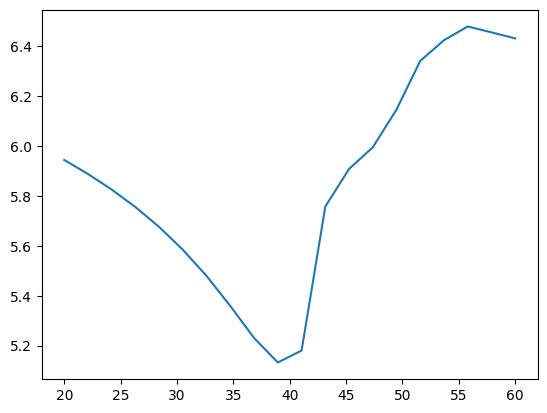

In [270]:
plt.plot(offsets, np.log10(mses))